# External Data: Web Crawling and Web Scraping Customer Reviews

This will be used to web crawl and web scrap Lazada and competitors websites for reviews from https://www.sitejabber.com/reviews/www.lazada.com.ph#reviews.
To see if we can play around as external data

The goals:
1. To capture reviews and product ratings of different competitors (Lazada, Qoo10, and Rokuten) from a page
2. To crawl and retrieve multiple page sources
3. to compare and review critical comments on users within the reviews
       What makes the reviews good (fast delivery time)?
       What makes the reviews bad (unreliable websites/ complicated)?

# Importing the necessary libraries

In [1]:
import pandas as pd
import sys
from PyQt4.QtGui import QApplication
from PyQt4.QtCore import QUrl
from PyQt4.QtWebKit import QWebPage
import bs4 as bs
import urllib
import re

ImportError: No module named 'PyQt4'

# Initiating ClassClient to generate Javascript Commands (Optional)
If Javascript needs to be initiated first

In [3]:
class Client(QWebPage):

    def __init__(self, url):
        self.app = QApplication(sys.argv)
        QWebPage.__init__(self)
        self.loadFinished.connect(self.on_page_load)
        self.mainFrame().load(QUrl(url))
        self.app.exec_()
        
    def on_page_load(self):
        self.app.quit()


## Soup Scraping

In [2]:
import dryscrape

sess = dryscrape.Session()
sess.visit('https://pythonprogramming.net/parsememcparseface/')
source = sess.body()


ImportError: No module named dryscrape

In [4]:
# Initialize soup from this website
# If this does not work then try again later as there might be some connection error to the website

# This is if you need to scrape using client
# url = 'https://www.sitejabber.com/reviews/www.lazada.com.ph?page=2#reviews'
# client_response = Client(url)
# source = str(client_response.mainFrame().toHtml().toUtf8())
# source


sauce = urllib.urlopen('https://www.sitejabber.com/reviews/www.lazada.com.ph?page=2#reviews').read()

In [5]:
soup = bs.BeautifulSoup(sauce,'lxml')

In [6]:
title = []
star_rating = []
text = []
date = []

for review in soup.find_all('div', {"class": "review"}):
    title.append(review.div.a.text)
    star_rating.append(review.find('div',{"class": "star_rating"}).get('title')[0])
    text.append(review.p.text)
    date.append(pd.to_datetime(review.meta.get('content')))


In [7]:
df = pd.DataFrame({'title':title,'rating':star_rating,'text':text,'date':date})
df.head()

,date,rating,text,title
0,2016-12-18,2,it says item was out of stock so i placed anot...,“CANCEL ORDER# 322915979”
1,2016-12-18,1,LAZADA. I ordered item with order number 39899...,“I WANT REFUND!”
2,2016-12-18,1,"Hello lazada philippines, i ordered for an ite...",“PLEASE CANCEL MY ORDER RIGHT AWAY”
3,2016-12-18,1,hanggang ngayon diko parin narereceive yung re...,"“Defective item, very poor packaging and poor ..."
4,2016-12-18,1,I received a shoe cabinet with missing parts l...,“Taking so long to pull-out incomplete item de...


## Repeat the scraping for multiple websites

In [8]:
# Initialize soup from this website
# If this does not work then try again later as there might be some connection error to the website

# Adding in url
start_urls=[]
for i in xrange(1,3):
    start_urls.append("https://www.sitejabber.com/reviews/www.lazada.com.ph?page="+str(i)+"#reviews")
    start_urls.append("https://www.sitejabber.com/reviews/www.qoo10.com?page="+str(i)+"#reviews")
    start_urls.append("https://www.sitejabber.com/reviews/www.rakuten.com?page="+str(i)+"#reviews")

title = []
star_rating = []
text = []
date = []
site = []                      

for url in start_urls:
#     print("I am at url ",url)
    sauce = urllib.urlopen(url).read()
    soup = bs.BeautifulSoup(sauce,'lxml')


    for review in soup.find_all('div', {"class": "review"}):
        
#         Use regex to remove non ascii character then append it to the list
        title.append( re.sub(r'[^\x00-\x7F]+','', review.div.a.text))
        text.append( re.sub(r'[^\x00-\x7F]+','', review.p.text))
   
        star_rating.append(review.find('div',{"class": "star_rating"}).get('title')[0])     
        date.append(pd.to_datetime(review.find('div',{"class": "time tiny_text faded_text"}).text))

#         Site placement for different url
        if "lazada" in url:
            site.append("lazada")
        elif "qoo10" in url:
            site.append("qoo10")
        elif "rakuten" in url:
            site.append("rakuten")
        else:
            site.append("unknown")

In [9]:
df = pd.DataFrame({'title':title,'rating':star_rating,'text':text,'date':date,'site':site})
print(df.shape)
df.head()

(117, 5)


,date,rating,site,text,title
0,2016-12-21,1,lazada,so disappointed!!!\n\r\ni have been waiting fo...,refused order
1,2016-12-21,1,lazada,"I've ordered so many times at Lazada, this was...","Delayed delivery, wrong item"
2,2016-12-20,1,lazada,I ordered toy for this coming christmas for my...,WASTE OF TIME
3,2016-12-20,1,lazada,I ordered many times dito sa lazaba but ngayon...,Cancelled order delivered and received by my mom
4,2016-12-20,1,lazada,"I already bought a lot from this site, but for...","Betrayal of trust, Fooling customers."


In [234]:
# Importing it to csv
df.to_csv('../Data/ecommercereview.csv')

# Text Analysis of Competitors and Markets
1. What are the rating spreads of each competitor and market
2. What are the common dissatisfactions
3. What are the common satisfactions

### Limitation
1. Number of data is purely limited at one blog (as of now)


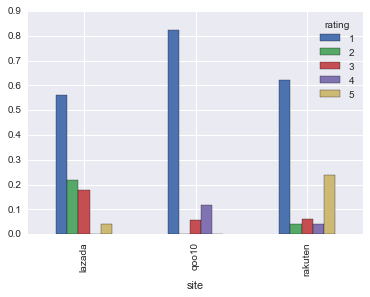

In [235]:
# What are the rating spreads of each competitor and market
import seaborn as sns
%matplotlib inline

value_counts = df.groupby('site').rating.value_counts(normalize=True)
value_counts.unstack('rating').plot(kind='bar')

# To visualize (not sure how to split these into 3 pies based on index)
# df.groupby('site').rating.value_counts(normalize=True).plot(kind='pie')

# Insights found
1. Most of the ratings are given express indications of disatisfaction (rating = 1 or 2)
2. Out of the different ratings. Qoo10 has the most disatisfaction.
3. Samples are most satisfied in Rakuten

In [15]:
# Pickling the dataframes
df.to_pickle('textreview.pickle')

## To be done
1. What are the common dissatisfactions
2. What are the common satisfactions

# Topic extractions

This section illustrates how to do approximate topic modeling in Python. We will use a technique called non-negative matrix factorization (NMF) that strongly resembles Latent Dirichlet Allocation (LDA) which we covered in the previous section, Topic modeling with MALLET. [1] Whereas LDA is a probabilistic model capable of expressing uncertainty about the placement of topics across texts and the assignment of words to topics, NMF is a deterministic algorithm which arrives at a single representation of the corpus. For this reason, NMF is often characterized as a machine learning algorithm. Like LDA, NMF arrives at its representation of a corpus in terms of something resembling “latent topics”.

In [4]:
# If pickle needs to be read
import pandas as pd
df = pd.read_pickle('textreview.pickle')
df.head()

,date,rating,site,text,title
0,2016-12-21,1,lazada,so disappointed!!!\n\r\ni have been waiting fo...,refused order
1,2016-12-21,1,lazada,"I've ordered so many times at Lazada, this was...","Delayed delivery, wrong item"
2,2016-12-20,1,lazada,I ordered toy for this coming christmas for my...,WASTE OF TIME
3,2016-12-20,1,lazada,I ordered many times dito sa lazaba but ngayon...,Cancelled order delivered and received by my mom
4,2016-12-20,1,lazada,"I already bought a lot from this site, but for...","Betrayal of trust, Fooling customers."


In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

X_train = df.text
print(X_train.head())

0    so disappointed!!!\n\r\ni have been waiting fo...
1    I've ordered so many times at Lazada, this was...
2    I ordered toy for this coming christmas for my...
3    I ordered many times dito sa lazaba but ngayon...
4    I already bought a lot from this site, but for...
Name: text, dtype: object


In [7]:
vectorizer = CountVectorizer(stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
vocab = np.array(vectorizer.get_feature_names())

print(X_train_dtm.shape)
print(len(vocab))

(117, 1720)
1720


**By analogy with LDA, we will use NMF to get a document-topic matrix (topics here will also be referred to as “components”) and a list of top words for each topic. We will make analogy clear by using the same variable names: doctopic and topic_words**

In [8]:
from sklearn import decomposition

num_topics = 8
num_top_words = 8
clf = decomposition.NMF(n_components=num_topics, random_state=1)

# this next step may take some time
doctopic = clf.fit_transform(X_train_dtm)


In [9]:
topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [177]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: na ko sa nyu hindi yung ung wag
Topic 1: order rakuten item card credit error shopping orders
Topic 2: phone lazada wrong reason change item product check
Topic 3: points purchase card buy days time service going
Topic 4: yung ko items na today strap lazada order
Topic 5: qoo10 seller refund service return goods stock sg
Topic 6: item lazada delivered rider delivery order office customer
Topic 7: site seller shipping sellers goods ordered received raukten


# Visualizing the topics

In [178]:
print(doctopic.shape)
doctopic
print(topic_words)

(117L, 8L)
[[u'na', u'ko', u'sa', u'nyu', u'hindi', u'yung', u'ung', u'wag'], [u'order', u'rakuten', u'item', u'card', u'credit', u'error', u'shopping', u'orders'], [u'phone', u'lazada', u'wrong', u'reason', u'change', u'item', u'product', u'check'], [u'points', u'purchase', u'card', u'buy', u'days', u'time', u'service', u'going'], [u'yung', u'ko', u'items', u'na', u'today', u'strap', u'lazada', u'order'], [u'qoo10', u'seller', u'refund', u'service', u'return', u'goods', u'stock', u'sg'], [u'item', u'lazada', u'delivered', u'rider', u'delivery', u'order', u'office', u'customer'], [u'site', u'seller', u'shipping', u'sellers', u'goods', u'ordered', u'received', u'raukten']]


In [179]:
import matplotlib.pyplot as plt

dftopic = pd.DataFrame(doctopic,columns=topic_words)
dftopicinv=dftopic.T

topic_series = []
for i in np.arange(dftopic.shape[0]):
    topic_series.append(dftopicinv[i].argmax())


dftopic['dominanttopic'] = topic_series
dftopic['text'] =df.text 
dftopic['rating'] = df.rating
dftopic.shape


(117, 11)

In [180]:
# Checking the popular dominant topics with the dominanttopic
print(dftopic['dominanttopic'].value_counts())

(ko, rakuten, lazada, purchase, ko, seller, lazada, seller)           32
(ung, shopping, product, service, lazada, stock, office, received)    20
(wag, orders, check, going, order, sg, customer, raukten)             19
(yung, error, item, time, strap, goods, order, ordered)               13
(nyu, card, reason, buy, na, service, rider, sellers)                 13
(na, order, phone, points, yung, qoo10, item, site)                   10
(sa, item, wrong, card, items, refund, delivered, shipping)            8
(hindi, credit, change, days, today, return, delivery, goods)          2
Name: dominanttopic, dtype: int64


In [181]:
# Checking text with dominant topic
dftopic[['dominanttopic','text']].head()

,dominanttopic,text
,,
,,
,,
,,
,,
,,
,,
0,"(ung, shopping, product, service, lazada, stoc...",so disappointed!!!\n\r\ni have been waiting fo...
1,"(na, order, phone, points, yung, qoo10, item, ...","I've ordered so many times at Lazada, this was..."
2,"(wag, orders, check, going, order, sg, custome...",I ordered toy for this coming christmas for my...


# Visualizing Topic

(ko, rakuten, lazada, purchase, ko, seller, lazada, seller)           20
(ung, shopping, product, service, lazada, stock, office, received)    16
(wag, orders, check, going, order, sg, customer, raukten)             14
(nyu, card, reason, buy, na, service, rider, sellers)                 10
(yung, error, item, time, strap, goods, order, ordered)                9
(na, order, phone, points, yung, qoo10, item, site)                    8
(sa, item, wrong, card, items, refund, delivered, shipping)            7
(hindi, credit, change, days, today, return, delivery, goods)          2
Name: dominanttopic, dtype: int64


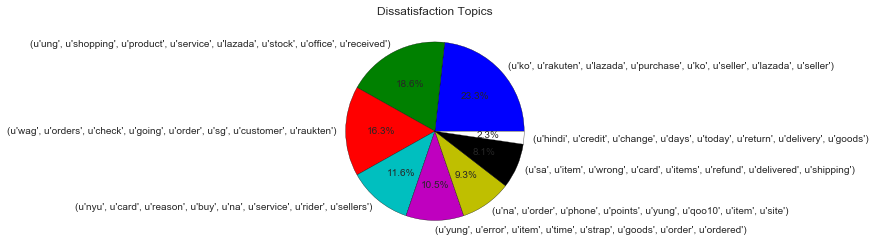

In [204]:
# What are the common dissatisfactions (rating <=2)
dissatisfied_frame =  dftopic[dftopic.rating<='2']
value_count = dissatisfied_frame['dominanttopic'].value_counts()
print(value_count)

# Visualization
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(value_count.values,labels=value_count.index,autopct="%1.1f%%") 
plt.title("Dissatisfaction Topics")
plt.show()

(ko, rakuten, lazada, purchase, ko, seller, lazada, seller)           12
(wag, orders, check, going, order, sg, customer, raukten)              5
(yung, error, item, time, strap, goods, order, ordered)                4
(ung, shopping, product, service, lazada, stock, office, received)     4
(nyu, card, reason, buy, na, service, rider, sellers)                  3
(na, order, phone, points, yung, qoo10, item, site)                    2
(sa, item, wrong, card, items, refund, delivered, shipping)            1
Name: dominanttopic, dtype: int64


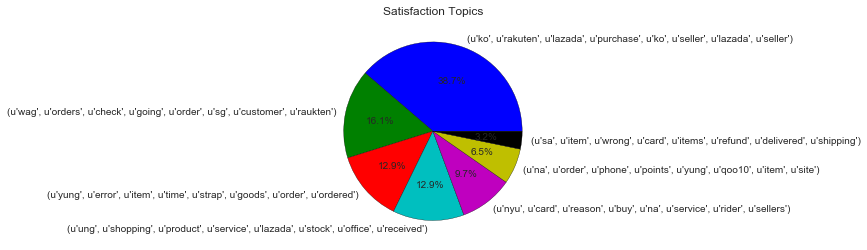

In [206]:
# What are the common satisfactions (rating >=3)
satisfied_frame =  dftopic[dftopic.rating>='3']

value_count = satisfied_frame['dominanttopic'].value_counts()
print(value_count)

# Visualization
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(value_count.values,labels=value_count.index,autopct="%1.1f%%") 
plt.title("Satisfaction Topics")
plt.show()

# Insights found
1. Buyers are most satisfied and disatisfied with purchases,stocks, and services from sellers
2. Buyers are most dissatisfied because of the stocks provided (empty) and late time of delivery
3. Buyers are most satisfied because of the timely delivery or the high quality service from the sellers (cancellation policy)

In [233]:
# Example texts
satisfied_frame.text.head()

7     Thank you Lazada for responding in a very time...
8     so far, I already ordered two item in lazada, ...
13    Hi Lazada, i just want to thank you for cancel...
21    12/12/16 - Order 335938579\r\ni accidentally c...
24    I just cancelled my order.Now I checked its st...
Name: text, dtype: object

In [223]:
# Example texts
dissatisfied_frame.text.head()

0    so disappointed!!!\n\r\ni have been waiting fo...
1    I've ordered so many times at Lazada, this was...
2    I ordered toy for this coming christmas for my...
3    I ordered many times dito sa lazaba but ngayon...
4    I already bought a lot from this site, but for...
Name: text, dtype: object